In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("census_income_learn.csv", header=None)
dft = pd.read_csv("census_income_test.csv", header=None)

Collecting the headers by parsing from text file.

In [5]:
def headers(file):
    with open(file, 'r') as f:
        h = []
        lines = f.readlines()
        for i in range(142, 184):
            temp = lines[i].partition(':')[0]
            if temp[0] == '|':
                i = i - 1
                continue
            h.append(temp)
        h.append('Class')
    return h
header = headers("census_income_metadata.txt")
print(pd.DataFrame(header))

                                             0
0                                          age
1                              class of worker
2                     detailed industry recode
3                   detailed occupation recode
4                                    education
5                                wage per hour
6                   enroll in edu inst last wk
7                                 marital stat
8                          major industry code
9                        major occupation code
10                                        race
11                             hispanic origin
12                                         sex
13                     member of a labor union
14                     reason for unemployment
15           full or part time employment stat
16                               capital gains
17                              capital losses
18                       dividends from stocks
19                              tax filer stat
20           

In [6]:
continuous = ['age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'instance weight',
              'num persons worked for employer', 'weeks worked in year']

In [11]:
def plot_(fig, l1, l2, t):
    plt.figure(fig)
    plt.xlabel(l1)
    plt.ylabel(l2)
    plt.xticks(rotation='vertical')
    plt.title(t)

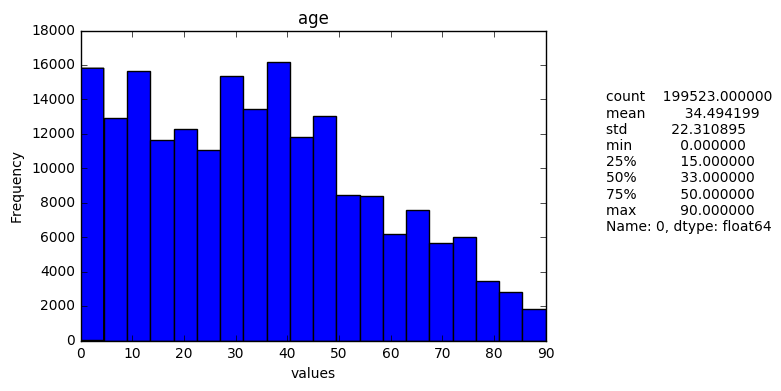

In [12]:
dist = df[0].sort_values()
plot_(0, 'values', header[0], header[0])
dist.plot.hist(bins=20)
plt.figtext(1, 0.4, df[0].describe())

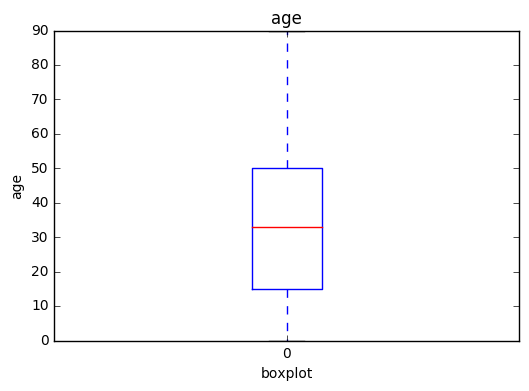

In [13]:
dist = df[0].sort_values()
plot_(0, 'boxplot', header[0], header[0])
dist.plot.box()

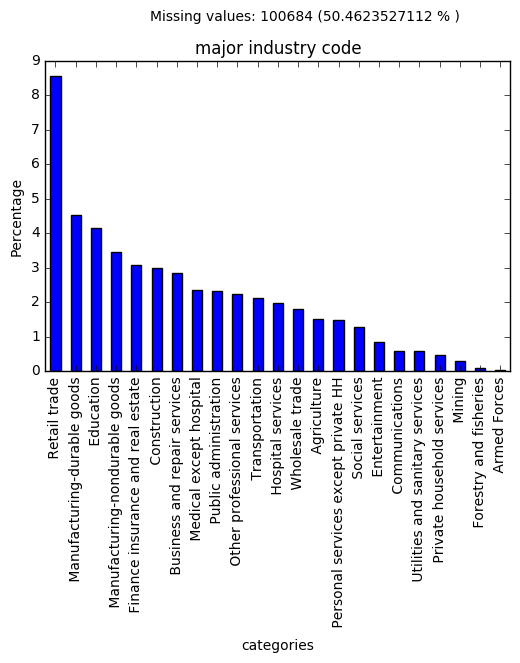

In [14]:
dist = df[8].value_counts()
miss = [' Not in universe', ' ?', ' Not in universe or children', ' Not in universe under 1 year old']
m = 0
for k in miss:
    if k in dist.index.tolist():
        m = +dist[k]
        dist = dist.drop(k)
dist = dist * 100. / df.shape[0]
plot_(0, 'categories', 'Percentage', header[8])
dist.plot.bar()
plt.figtext(0.3, 1, 'Missing values: ' + str(m) + ' (' + str(m * 100. / df.shape[0]) + ' % )')

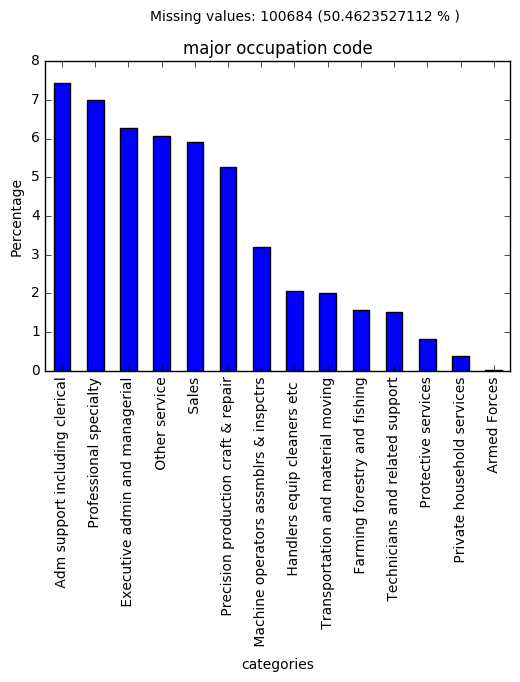

In [15]:
dist = df[9].value_counts()
miss = [' Not in universe', ' ?', ' Not in universe or children', ' Not in universe under 1 year old']
m = 0
for k in miss:
    if k in dist.index.tolist():
        m = +dist[k]
        dist = dist.drop(k)
dist = dist * 100. / df.shape[0]
plot_(0, 'categories', 'Percentage', header[9])
dist.plot.bar()
plt.figtext(0.3, 1, 'Missing values: ' + str(m) + ' (' + str(m * 100. / df.shape[0]) + ' % )')

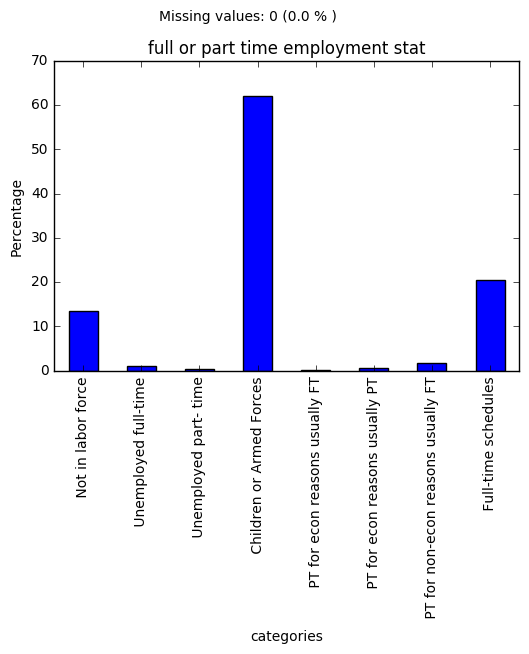

In [16]:
dist = df[15].value_counts(sort=False)
miss = [' Not in universe', ' ?', ' Not in universe or children', ' Not in universe under 1 year old']
m = 0
for k in miss:
    if k in dist.index.tolist():
        m = +dist[k]
        dist = dist.drop(k)
dist = dist * 100. / df.shape[0]
plot_(0, 'categories', 'Percentage', header[15])
dist.plot.bar()
plt.figtext(0.3, 1, 'Missing values: ' + str(m) + ' (' + str(m * 100. / df.shape[0]) + ' % )')

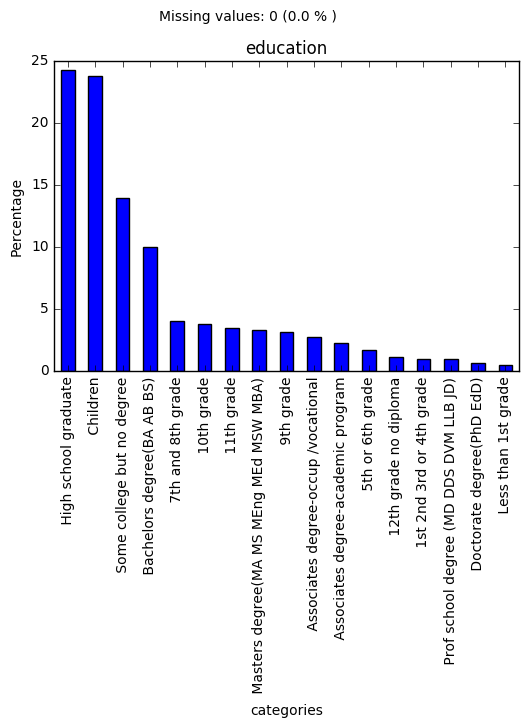

In [17]:
dist = df[4].value_counts(sort=True)
miss = [' Not in universe', ' ?', ' Not in universe or children', ' Not in universe under 1 year old']
m = 0
for k in miss:
    if k in dist.index.tolist():
        m = +dist[k]
        dist = dist.drop(k)
dist = dist * 100. / df.shape[0]
plot_(0, 'categories', 'Percentage', header[4])
dist.plot.bar()
plt.figtext(0.3, 1, 'Missing values: ' + str(m) + ' (' + str(m * 100. / df.shape[0]) + ' % )')

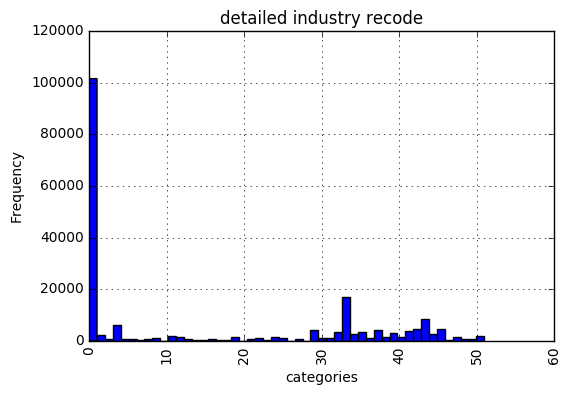

In [18]:
dist = df[2].value_counts(sort=False)
miss = [' Not in universe', ' ?', ' Not in universe or children', ' Not in universe under 1 year old']
m = 0
for k in miss:
    if k in dist.index.tolist():
        m = +dist[k]
        dist = dist.drop(k)
dist = dist * 100. / df.shape[0]
plot_(0, 'categories', 'Frequency', header[2])
df[2].hist(bins=50)

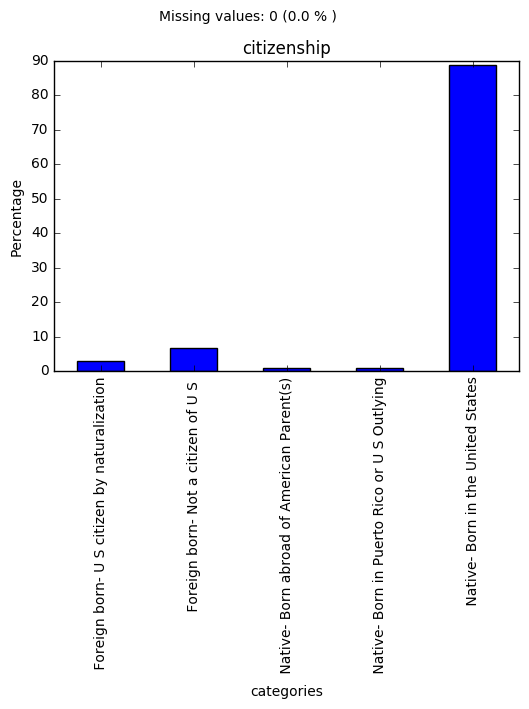

In [19]:
dist = df[35].value_counts(sort=False)
miss = [' Not in universe', ' ?', ' Not in universe or children', ' Not in universe under 1 year old']
m = 0
for k in miss:
    if k in dist.index.tolist():
        m = +dist[k]
        dist = dist.drop(k)
dist = dist * 100. / df.shape[0]
plot_(0, 'categories', 'Percentage', header[35])
dist.plot.bar()
plt.figtext(0.3, 1, 'Missing values: ' + str(m) + ' (' + str(m * 100. / df.shape[0]) + ' % )')

In [20]:
def encode(df):
    for i in range(df.shape[1]):
        df = df.rename(columns={i: header[i]})
        if header[i] not in continuous and df[header[i]].dtype != 'int64':
            from sklearn import preprocessing
            le = preprocessing.LabelEncoder()
            le.fit(df[header[i]])
            df[header[i]] = le.transform(df[header[i]])
    return df
def restore():
    df = pd.read_csv("census_income_learn.csv", header=None)
    dft = pd.read_csv("census_income_test.csv", header=None)
    for i in range(df.shape[1]):
        df = df.rename(columns={i: header[i]})
        dft = dft.rename(columns={i: header[i]})
    return df,dft

In [35]:
df = encode(df)
dft = encode(dft)
print(df.head())

   age  class of worker  detailed industry recode  detailed occupation recode  \
0   73                3                         0                           0   
1   58                6                         4                          34   
2   18                3                         0                           0   
3    9                3                         0                           0   
4   10                3                         0                           0   

   education  wage per hour  enroll in edu inst last wk  marital stat  \
0         12              0                           2             6   
1         16              0                           2             0   
2          0              0                           1             4   
3         10              0                           2             4   
4         10              0                           2             4   

   major industry code  major occupation code  ...    country of birth fat

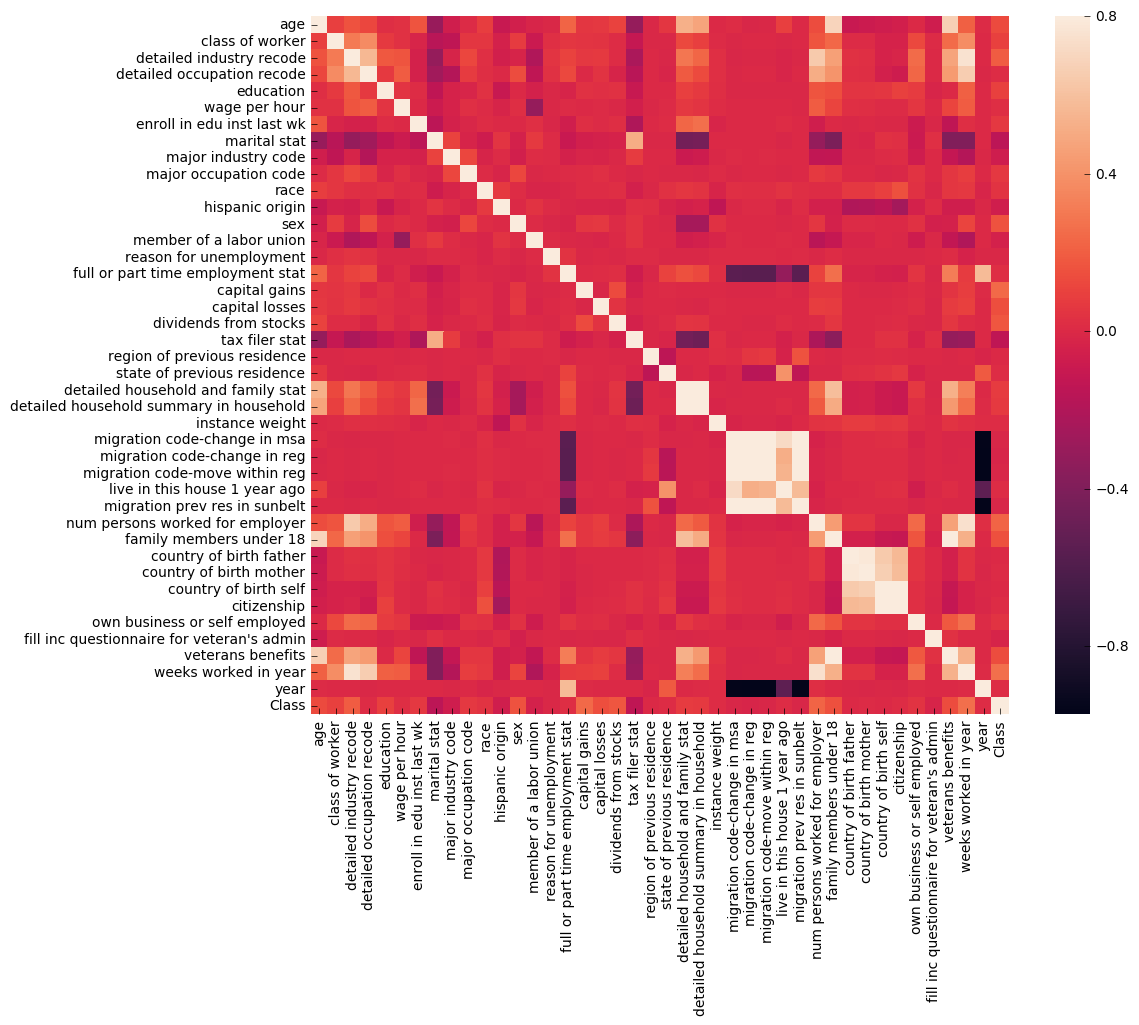

In [22]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True);

detailed household and family stat = summary in houshold 

all migrations

migrations are opposite to year

year is somewhat related to full or part time employement stat

age is similar to family members under 18, veterans benefits

country of birth = citizenship

weeks worked in year = num persons worked for employer = industry code

family members under 18 = veterens benefits

Nothing is correlated to Class directly!!!!!

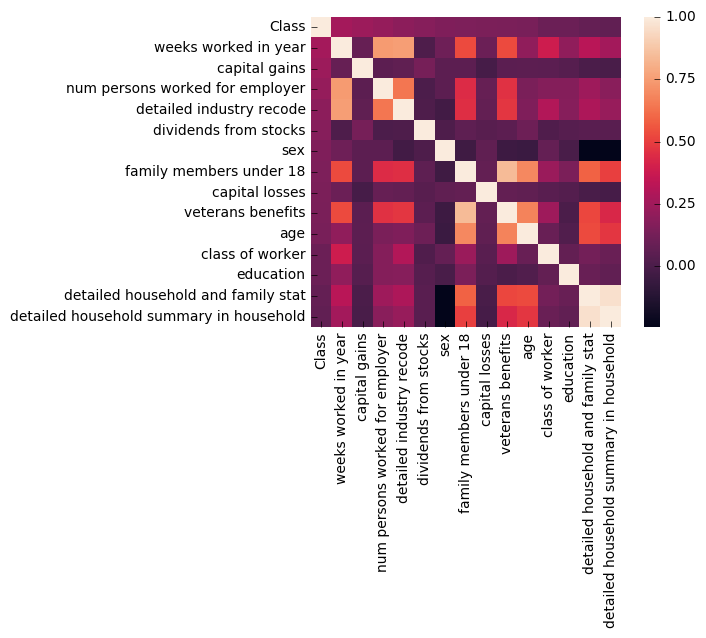

In [23]:
k = 15
cols = corrmat.nlargest(k, 'Class')['Class'].index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, square=True, yticklabels=cols.values, xticklabels=cols.values)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [37]:
x_tr,y_tr = df.drop('Class', axis=1), df["Class"]
print(x_tr.shape,y_tr.shape)
lr.fit(x_tr,y_tr)

(199523, 41) (199523,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
w = lr.coef_
ind=np.array(w.argsort()[0])[::-1]
theta = -99
for i in ind:
    if w[0,i]>theta:
        print(i," : ",w[0,i]," : ",x_tr.columns[i])

12  :  1.56689607225  :  sex
31  :  0.471264208268  :  family members under 18
6  :  0.466481973462  :  enroll in edu inst last wk
28  :  0.234151414907  :  live in this house 1 year ago
30  :  0.150462199907  :  num persons worked for employer
23  :  0.146237514923  :  detailed household summary in household
10  :  0.11201355974  :  race
20  :  0.0718623643303  :  region of previous residence
13  :  0.0701570965275  :  member of a labor union
39  :  0.0633881748574  :  weeks worked in year
38  :  0.0435644362565  :  veterans benefits
9  :  0.0431666555086  :  major occupation code
1  :  0.0382545727847  :  class of worker
14  :  0.0374779672455  :  reason for unemployment
4  :  0.0364488061151  :  education
27  :  0.0351222308028  :  migration code-move within reg
0  :  0.0282634936931  :  age
35  :  0.0154734011806  :  citizenship
2  :  0.0059070129721  :  detailed industry recode
17  :  0.000664297541704  :  capital losses
18  :  0.000220038898422  :  dividends from stocks
16  :  0.

Again NOT that much in detail
like education!!
Labelencoding fails

In [42]:
df,dft = restore()
def onehot(df):
    for i in range(df.shape[1]-1):
        if header[i] not in continuous:
            dummies = pd.get_dummies(df[header[i]]).rename(columns=lambda x: header[i]+'_'+str(x))
            df = pd.concat([df, dummies], axis=1)
            df.drop(header[i], inplace=True, axis=1)
    return df
dfoh = onehot(df)
x_tr,y_tr = dfoh.drop('Class', axis=1), df["Class"]
print(x_tr.shape,y_tr.shape)
lr.fit(x_tr,y_tr)

(199523, 511) (199523,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
w = lr.coef_
ind=np.array(w.argsort()[0])[::-1]
top_results={i:0 for i in header[:-1]}
for i in ind:
    col = x_tr.columns[i].partition('_')[0]
    top_results[col]+=abs(w[0,i])
    #print(w[0,i]," : ",x_tr.columns[i])
print("Score\t :\tIndex : Column")
for i,j in sorted(top_results.items(), key=lambda x: x[1])[::-1]:
    print(j,"\t:",header.index(i),":",i)
df_red = dfoh[ind[w[0,ind]>theta]]

Score	 :	Index : Column
11.6686315769 	: 3 : detailed occupation recode
11.2549279468 	: 4 : education
8.83446425134 	: 2 : detailed industry recode
4.99598822993 	: 9 : major occupation code
3.61321967673 	: 8 : major industry code
2.49628478289 	: 19 : tax filer stat
2.4758196386 	: 33 : country of birth mother
2.35745811005 	: 21 : state of previous residence
2.11186705074 	: 1 : class of worker
2.02705663502 	: 32 : country of birth father
2.00198247634 	: 34 : country of birth self
1.90024564485 	: 22 : detailed household and family stat
1.6875230465 	: 23 : detailed household summary in household
1.54702122358 	: 15 : full or part time employment stat
1.35923274977 	: 11 : hispanic origin
1.13565343749 	: 12 : sex
1.05502081377 	: 36 : own business or self employed
1.05237143367 	: 25 : migration code-change in msa
1.03977725967 	: 20 : region of previous residence
0.965782470267 	: 27 : migration code-move within reg
0.959103125941 	: 14 : reason for unemployment
0.918568506309 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

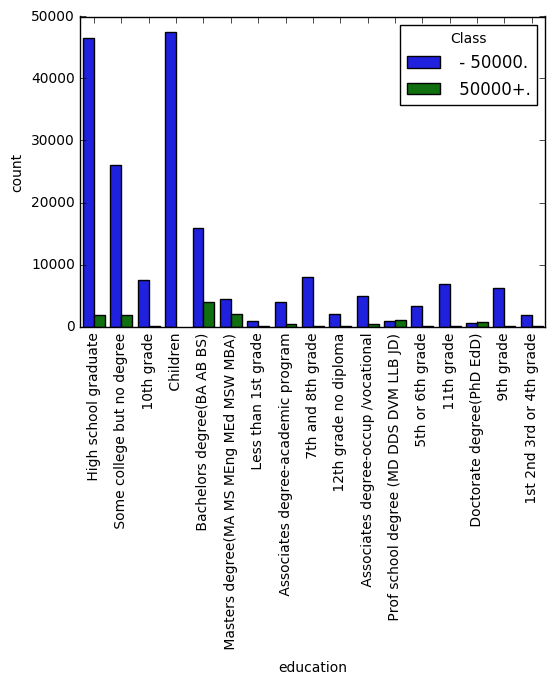

In [150]:
x=4
sns.countplot(x=header[x], hue="Class", data=df)
plt.xticks(rotation="vertical")

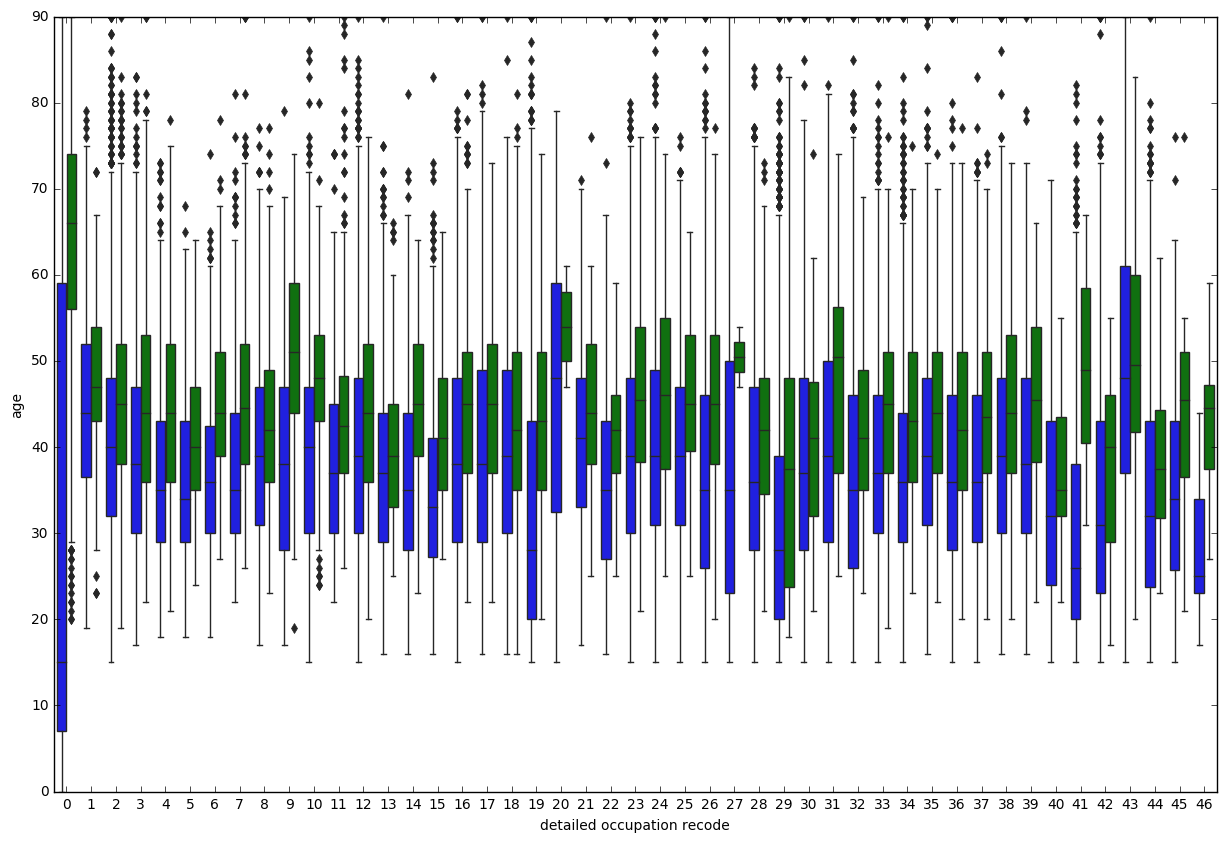

In [122]:
x,y=3,0
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(ax=ax,x=header[x], y=header[y], hue="Class", data=df)
ax.legend_.remove()

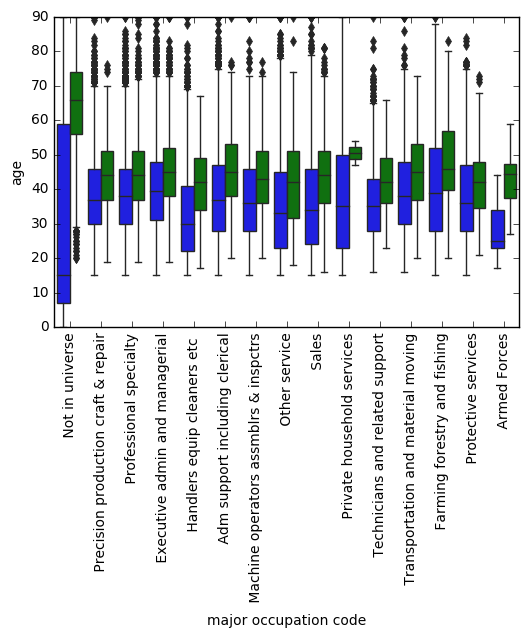

In [53]:
x,y=9,0
plot_(0, header[x],header[y], "")
ax=sns.boxplot(x=header[x], y=header[y], hue="Class", data=df)
ax.legend_.remove()

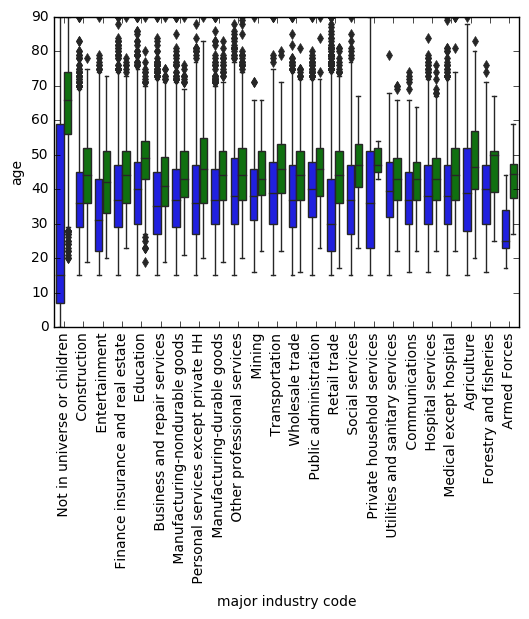

In [130]:
x,y=8,0
plot_(0, header[x],header[y], "")
ax=sns.boxplot(x=header[x], y=header[y], hue="Class", data=df)
ax.legend_.remove()

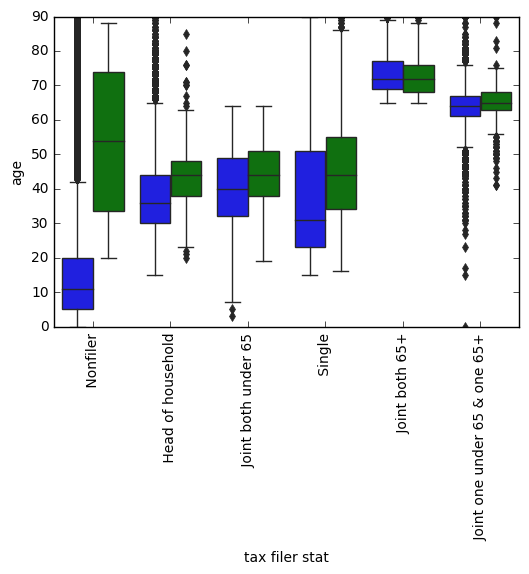

In [56]:
x,y=19,0
plot_(0, header[x],header[y], "")
ax=sns.boxplot(x=header[x], y=header[y], hue="Class", data=df)
ax.legend_.remove()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

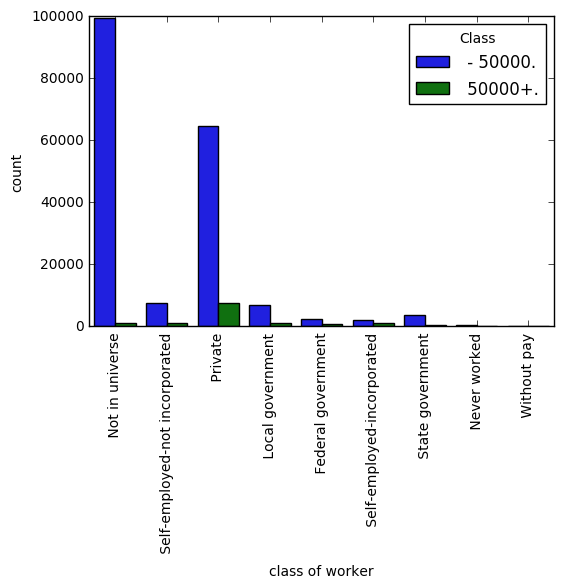

In [153]:
x=1
sns.countplot(x=header[x], hue="Class", data=df)
plt.xticks(rotation="vertical")

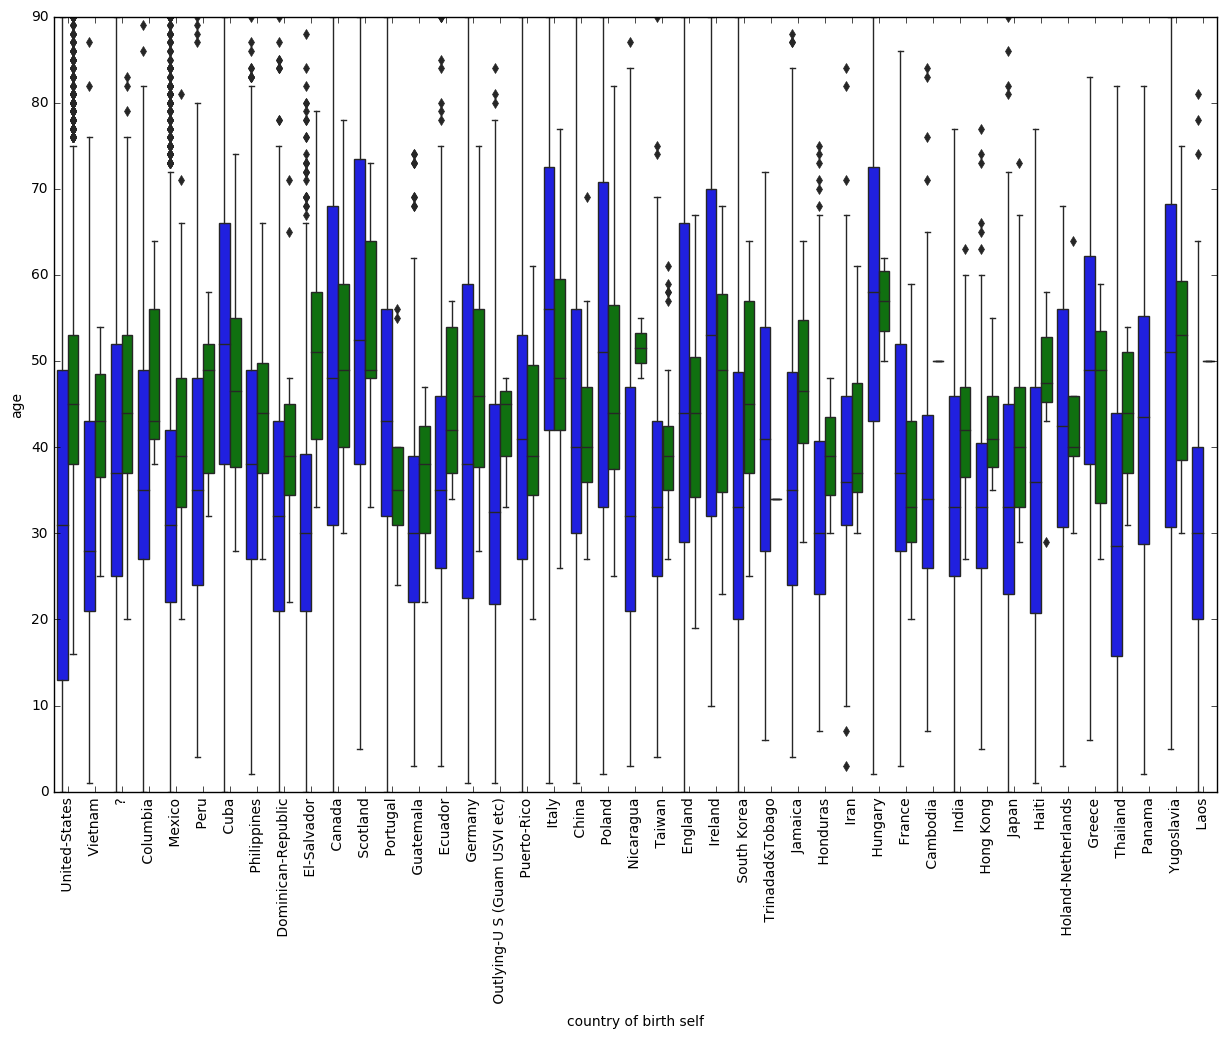

In [157]:
x,y=34,0
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(ax=ax,x=header[x], y=header[y], hue="Class", data=df)
plt.xticks(rotation="vertical")
ax.legend_.remove()